In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
from cycler import cycler

mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.markersize'] = 1.4

mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.major.width'] = 0.4
mpl.rcParams['xtick.minor.width'] = 0.4
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2

mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.major.width'] = 0.4
mpl.rcParams['ytick.minor.width'] = 0.4
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2

mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['axes.labelsize'] = 10


mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 9

mpl.rcParams['figure.figsize'] = 6, 4

mpl.rcParams['axes.prop_cycle'] = cycler("color", ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff7f0e']

# Plotting
fig_dir = "../figs"

def create_lineplot_histogram(distribution, bins=20):
    vals, bin_edges = np.histogram(distribution, bins=bins)

    xvals = np.repeat(bin_edges, 2)
    yvals = np.repeat(vals, 2)
    yvals = np.concatenate(([0], yvals, [0]))

    return xvals, yvals

In [3]:
forget_sparsity = np.loadtxt(f'../data/top_features/gemma-2-2b-it-sparsity/layer3_mean_feature_activation_forget.txt', dtype=float)
retain_sparsity = np.loadtxt(f'../data/top_features/gemma-2-2b-it-sparsity/layer3_mean_feature_activation_retain.txt', dtype=float)

In [11]:
from unlearning.feature_activation import get_top_features
top_features_custom = get_top_features(forget_sparsity, retain_sparsity, retain_threshold=0.01)

[ 8786  3025 11913 14227   679  1082 10793  6691  8803  8934  9839 16064
   616 10238 16169  8396 13219 11380  3061  2659]


In [20]:
forget_sparsity[forget_sparsity == 0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [23]:
len(retain_sparsity[retain_sparsity == 0])

138

/tmp/ipykernel_3248/1470269363.py:4: RuntimeWarning: divide by zero encountered in log10
  y_value = np.log10(retain_sparsity + eps)
/tmp/ipykernel_3248/1470269363.py:5: RuntimeWarning: divide by zero encountered in log10
  x_value = np.log10(forget_sparsity + eps)


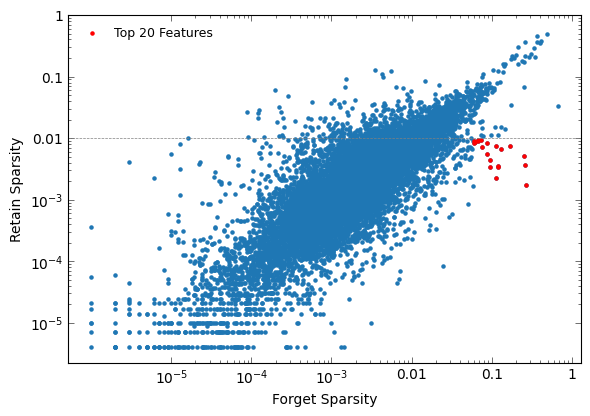

In [24]:
fig, ax = plt.subplots(figsize=(6, 4))

eps = 0
y_value = np.log10(retain_sparsity + eps)
x_value = np.log10(forget_sparsity + eps)

top_20_features = top_features_custom[:20]
top_y_values = y_value[top_20_features]
top_x_values = x_value[top_20_features]

# Plot scatter points
ax.scatter(x_value, y_value, s=5)
ax.scatter(top_x_values, top_y_values, s=5, color='red', label='Top 20 Features')

yticks = [-5, -4, -3, -2, -1, 0]
yticklabels = [r"10$^{-5}$", r"10$^{-4}$", r"10$^{-3}$", 0.01, 0.1, 1]
yminor_ticks = np.log10(np.concatenate((np.arange(1e-5, 1e-4, 1e-5),
                                        np.arange(1e-4, 1e-3, 1e-4),
                                        np.arange(1e-3, 1e-2, 1e-3),
                                        np.arange(1e-2, 1e-1, 1e-2),
                                        np.arange(1e-1, 1, 1e-1))))
xticks = [-5, -4, -3, -2, -1, 0]
yticklabels = [r"10$^{-5}$", r"10$^{-4}$", r"10$^{-3}$", 0.01, 0.1, 1]
xminor_ticks = np.log10(np.concatenate((np.arange(1e-5, 1e-4, 1e-5),
                                        np.arange(1e-4, 1e-3, 1e-4),
                                        np.arange(1e-3, 1e-2, 1e-3),
                                        np.arange(1e-2, 1e-1, 1e-2),
                                        np.arange(1e-1, 1, 1e-1))))
# add dotted line at y=0.01
ax.axhline(y=np.log10(0.01), color='grey', linestyle='--', linewidth=0.5)
                        
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.set_yticks(yminor_ticks, minor=True)
# ax.set_ylim(-6, 0)

ax.set_xticks(xticks)
ax.set_xticklabels(yticklabels)
ax.set_xticks(xminor_ticks, minor=True)
# ax.set_ylim(-6, 0)

ax.legend()

ax.set_xlabel('Forget Sparsity')
ax.set_ylabel(f'Retain Sparsity')
# ax.invert_yaxis()

fig.subplots_adjust(right=0.98, top=0.98)
fig.savefig(fig_dir + f"/multiple_features/sparsity_plot.png", dpi=400)

In [12]:
(forget_sparsity == 0).sum()

21

In [13]:
(retain_sparsity == 0).sum()

138